In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# display float type upto 2 digits after decimal
pd.options.display.float_format='{:,.2f}'.format

In [2]:
# display max rows and columns
pd.set_option('display.max_columns',100)

In [3]:
# class to apply different formatting styles while printing
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# load train and test dataset
fraud = pd.read_csv('fraudTrain.csv', index_col=0)
fraud_test = pd.read_csv('fraudTest.csv', index_col=0)

In [5]:
# display top 5 rows
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [6]:
fraud_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


In [7]:
# check the shape
print(fraud.shape)
print(fraud_test.shape)

(1296675, 22)
(555719, 22)


In [8]:
# check the info
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [9]:
# check the count of unique values
fraud.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [10]:
# statistical analysis
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,"1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00"
mean,"417,192,042,079,641,088.00",70.35,"48,800.67",38.54,-90.23,"88,824.44","1,349,243,636.73",38.54,-90.23,0.01
std,"1,308,806,447,000,789,248.00",160.32,"26,893.22",5.08,13.76,"301,956.36","12,841,278.42",5.11,13.77,0.08
min,"60,416,207,185.00",1.00,"1,257.00",20.03,-165.67,23.00,"1,325,376,018.00",19.03,-166.67,0.00
25%,"180,042,946,491,150.00",9.65,"26,237.00",34.62,-96.80,743.00,"1,338,750,742.50",34.73,-96.90,0.00
50%,"3,521,417,320,836,166.00",47.52,"48,174.00",39.35,-87.48,"2,456.00","1,349,249,747.00",39.37,-87.44,0.00
75%,"4,642,255,475,285,942.00",83.14,"72,042.00",41.94,-80.16,"20,328.00","1,359,385,375.50",41.96,-80.24,0.00
max,"4,992,346,398,065,154,048.00","28,948.90","99,783.00",66.69,-67.95,"2,906,700.00","1,371,816,817.00",67.51,-66.95,1.00


In [11]:
fraud.amt.describe()

count   1,296,675.00
mean           70.35
std           160.32
min             1.00
25%             9.65
50%            47.52
75%            83.14
max        28,948.90
Name: amt, dtype: float64

### <font color=red> Data Preprocessing

### <font color=green> Data Cleaning

**Merchant**

In [12]:
fraud.merchant.str.contains('fraud')

0          True
1          True
2          True
3          True
4          True
           ... 
1296670    True
1296671    True
1296672    True
1296673    True
1296674    True
Name: merchant, Length: 1296675, dtype: bool

In [13]:
# cleaning 'merchant'
fraud.merchant = fraud.merchant.apply(lambda x:x.split('_')[1])

#for test data
fraud_test.merchant = fraud_test.merchant.apply(lambda x:x.split('_')[1])

### <font color=green> Converting data types

In [14]:
# converting to datetime
for i in ['trans_date_trans_time','dob']:
    fraud[i] = pd.to_datetime(fraud[i])
    # for test data
    fraud_test[i] = pd.to_datetime(fraud_test[i])

In [15]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

### <font color=green> Deriving new features

<font color=brown> **Age**
- age_days
- age_years

In [16]:
# today's date
today_date = pd.to_datetime('today')
today_date

Timestamp('2023-02-05 17:44:41.898693')

In [17]:
# calculating age wrt today in days and years
fraud['age_days'] = (today_date-fraud.dob).apply(lambda x:x.days)
fraud['age_years'] = fraud.age_days/365

# for test data
fraud_test['age_days'] = (today_date-fraud_test.dob).apply(lambda x:x.days)
fraud_test['age_years'] = fraud_test.age_days/365

<font color=brown> **Haversine distance**

In [18]:
# import libraries
from sklearn.metrics.pairwise import haversine_distances
from math import radians

#function to calculate haversine distance
def haversine_dist(arr):
    origin=arr[0]
    destination=arr[1]
    origin_rad = [radians(x) for x in origin]
    destination_rad = [radians(x) for x in destination]
    dist = haversine_distances([origin_rad, destination_rad])
    return round(dist[0][1]*6371000/1000,2) # multiply by Earth radius to get kilometers

In [19]:
# two new columns to store origin and destination lat,long
fraud['origin'] = np.array(fraud[['lat','long']]).tolist()
fraud['destination'] = np.array(fraud[['merch_lat','merch_long']]).tolist()

# calculate haversine distance
fraud['distance'] = fraud[['origin','destination']].apply(func = haversine_dist, axis=1)

# drop the origin and destination column
fraud.drop(columns=['origin','destination'], inplace=True)

In [20]:
# for test data
# two new columns to store origin and destination lat,long
fraud_test['origin'] = np.array(fraud_test[['lat','long']]).tolist()
fraud_test['destination'] = np.array(fraud_test[['merch_lat','merch_long']]).tolist()

# calculate haversine distance
fraud_test['distance'] = fraud_test[['origin','destination']].apply(func = haversine_dist, axis=1)

# drop the origin and destination column
fraud_test.drop(columns=['origin','destination'], inplace=True)

<font color=brown> **trans_date** and **trans_time**

In [21]:
# trans_date
fraud['trans_date'] = fraud['trans_date_trans_time'].apply(lambda x:x.date())
#fraud['trans_date'] = pd.to_datetime(fraud['trans_date'])

# trans_time
fraud['trans_time'] = fraud['trans_date_trans_time'].apply(lambda x:x.time())
#fraud['trans_time'] = pd.to_datetime(fraud['trans_time'])


In [22]:
# for test data
# trans_date
fraud_test['trans_date'] = fraud_test['trans_date_trans_time'].apply(lambda x:x.date())

# trans_time
fraud_test['trans_time'] = fraud_test['trans_date_trans_time'].apply(lambda x:x.time())

<font color=brown> Date and time related columns
- monthyear
- month
- day_of_week
- day_of_month
- hour_of_day
- is_weekend

In [23]:
# month_year
fraud['monthyear'] = fraud['trans_date_trans_time'].dt.to_period('M')

# month
fraud['month'] = fraud['trans_date_trans_time'].apply(lambda x:x.month)

# day of the week
fraud['day_of_week'] = fraud.trans_date_trans_time.apply(lambda x:x.isoweekday())

# day of the month
fraud['day_of_month'] = fraud['trans_date_trans_time'].apply(lambda x:x.day)

# hour of the day
fraud['hour_of_day'] = fraud.trans_time.apply(lambda x:x.hour)

In [24]:
#for test data
# month_year
fraud_test['monthyear'] = fraud_test['trans_date_trans_time'].dt.to_period('M')

# month
fraud_test['month'] = fraud_test['trans_date_trans_time'].apply(lambda x:x.month)

# day of the week
fraud_test['day_of_week'] = fraud_test.trans_date_trans_time.apply(lambda x:x.isoweekday())

# day of the month
fraud_test['day_of_month'] = fraud_test['trans_date_trans_time'].apply(lambda x:x.day)

# hour of the day
fraud_test['hour_of_day'] = fraud_test.trans_time.apply(lambda x:x.hour)

In [25]:
#func to check if its a weekend
def weekend(d):
    if d>5:
        return 1
    else:
        return 0

In [26]:
# is_weekend
fraud['is_weekend']= fraud.day_of_week.apply(weekend)

# for test data
fraud_test['is_weekend']= fraud_test.day_of_week.apply(weekend)

**Dividing data**

In [27]:
# dividing data
fraud_0 = fraud[fraud.is_fraud==0]
fraud_1 = fraud[fraud.is_fraud==1]

In [28]:
print(fraud_0.shape)
print(fraud_1.shape)

(1289169, 33)
(7506, 33)


## <font color=red>  Data Visualisation

**is_fraud**

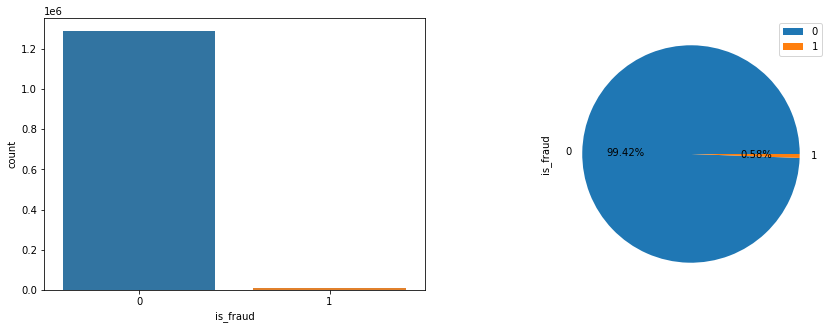

In [29]:
# checking fraud rate
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(fraud.is_fraud)

plt.subplot(1,2,2)
fraud.is_fraud.value_counts().plot.pie(autopct='%.2f%%')
plt.legend()

plt.show()

- there is class imbalance in the dataset

**Amt**

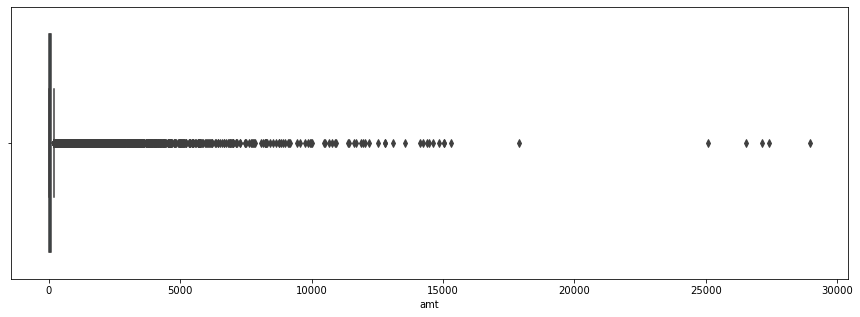

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(fraud['amt'])
plt.show()

In [31]:
fraud.amt.quantile([0.25,0.5,0.75,0.9,0.95,0.99,0.995,1])

0.25        9.65
0.50       47.52
0.75       83.14
0.90      136.67
0.95      196.31
0.99      545.99
0.99      844.22
1.00   28,948.90
Name: amt, dtype: float64

In [32]:
Q1 = fraud.amt.quantile(0.25)
Q3 = fraud.amt.quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3+1.5*IQR

print(Q1, Q3, IQR, upper_whisker)

9.65 83.14 73.49 193.375


In [33]:
amt_mean = fraud.amt.mean()
amt_sd = fraud.amt.std()
amt_3sd = amt_mean+3*amt_sd

print(amt_mean, amt_sd, amt_3sd)

70.35103545606833 160.3160385715229 551.2991511706371


In [34]:
fraud_copy=fraud.copy()

In [35]:
fraud_copy=fraud_copy[fraud_copy.amt<=amt_3sd]
fraud_copy.amt.describe()

count   1,283,937.00
mean           60.49
std            67.21
min             1.00
25%             9.56
50%            46.84
75%            81.72
max           551.27
Name: amt, dtype: float64

<AxesSubplot:xlabel='amt', ylabel='Count'>

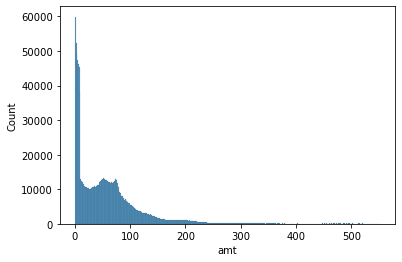

In [36]:
sns.histplot(fraud_copy.amt)

<AxesSubplot:xlabel='amt'>

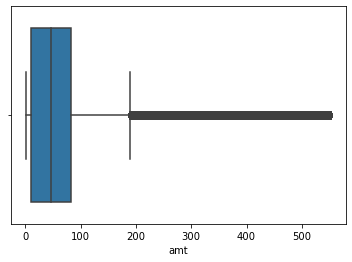

In [37]:
sns.boxplot(fraud_copy.amt)

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

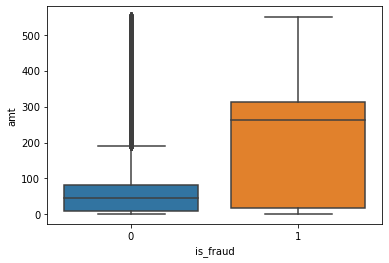

In [38]:
sns.boxplot(data=fraud_copy, y='amt', x='is_fraud')

In [39]:
fraud_copy=fraud.copy()
fraud_copy=fraud_copy[fraud_copy.amt<=1500]
fraud_copy.amt.describe()

count   1,295,379.00
mean           67.42
std           101.42
min             1.00
25%             9.64
50%            47.45
75%            82.99
max         1,499.47
Name: amt, dtype: float64

<AxesSubplot:xlabel='amt', ylabel='Count'>

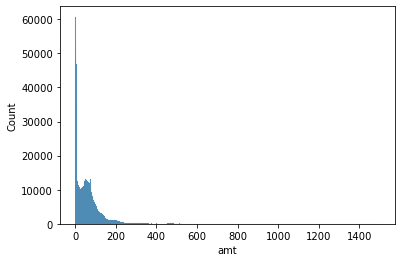

In [40]:
sns.histplot(fraud_copy.amt)

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

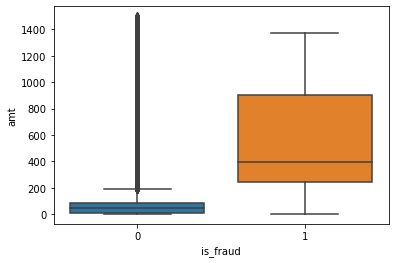

In [41]:
sns.boxplot(data=fraud_copy, y='amt', x='is_fraud')

In [42]:
print(fraud.shape)
print(fraud_copy.shape)

(1296675, 33)
(1295379, 33)


In [43]:
fraud.amt.describe()

count   1,296,675.00
mean           70.35
std           160.32
min             1.00
25%             9.65
50%            47.52
75%            83.14
max        28,948.90
Name: amt, dtype: float64

- outliers present


<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

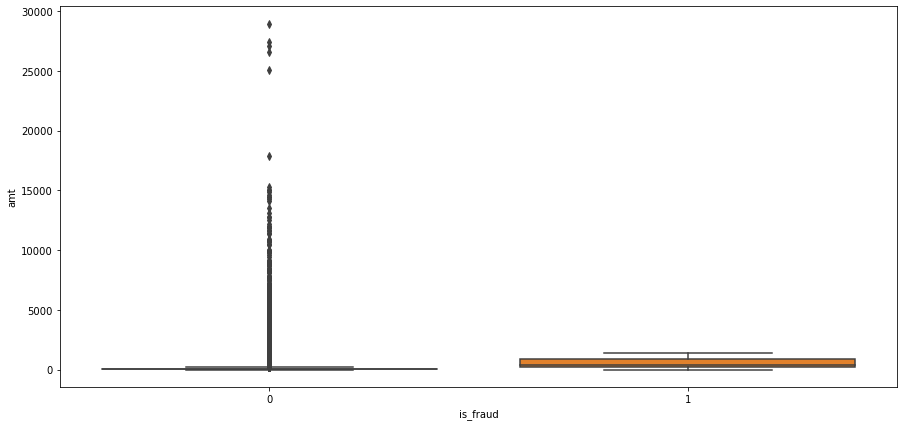

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(data=fraud, y='amt', x='is_fraud')

In [45]:
print(color.BOLD+color.UNDERLINE+color.RED+'Overall:'+color.END)
print(fraud.amt.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Not Fraud:'+color.END)
print(fraud_0.amt.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Fraud:'+color.END)
print(fraud_1.amt.describe())

Overall:
count   1,296,675.00
mean           70.35
std           160.32
min             1.00
25%             9.65
50%            47.52
75%            83.14
max        28,948.90
Name: amt, dtype: float64
Not Fraud:
count   1,289,169.00
mean           67.67
std           154.01
min             1.00
25%             9.61
50%            47.28
75%            82.54
max        28,948.90
Name: amt, dtype: float64
Fraud:
count   7,506.00
mean      531.32
std       390.56
min         1.06
25%       245.66
50%       396.50
75%       900.88
max     1,376.04
Name: amt, dtype: float64


- mean and median of fraud amount is quite high when compared to overall mean and median
- no outliers in case of fraud amounts

<AxesSubplot:xlabel='amt', ylabel='Count'>

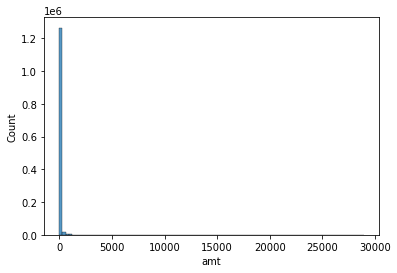

In [46]:
sns.histplot(fraud.amt, bins=100)

**Category**

<AxesSubplot:xlabel='category', ylabel='count'>

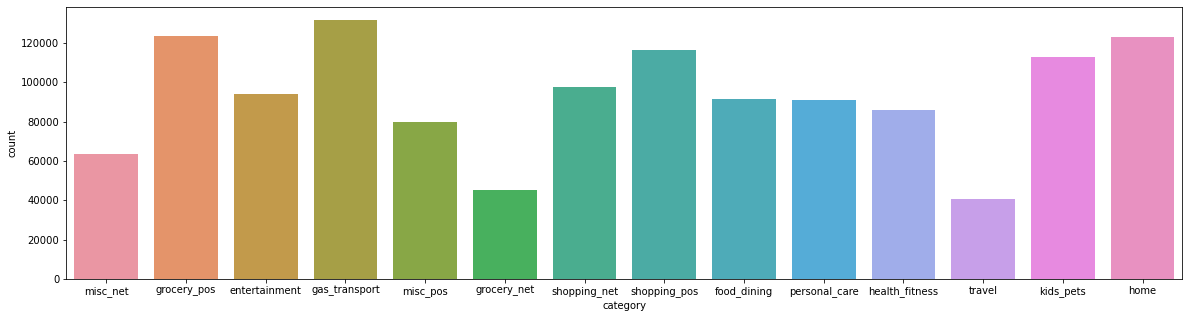

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(data = fraud, x = 'category')

<AxesSubplot:xlabel='category', ylabel='count'>

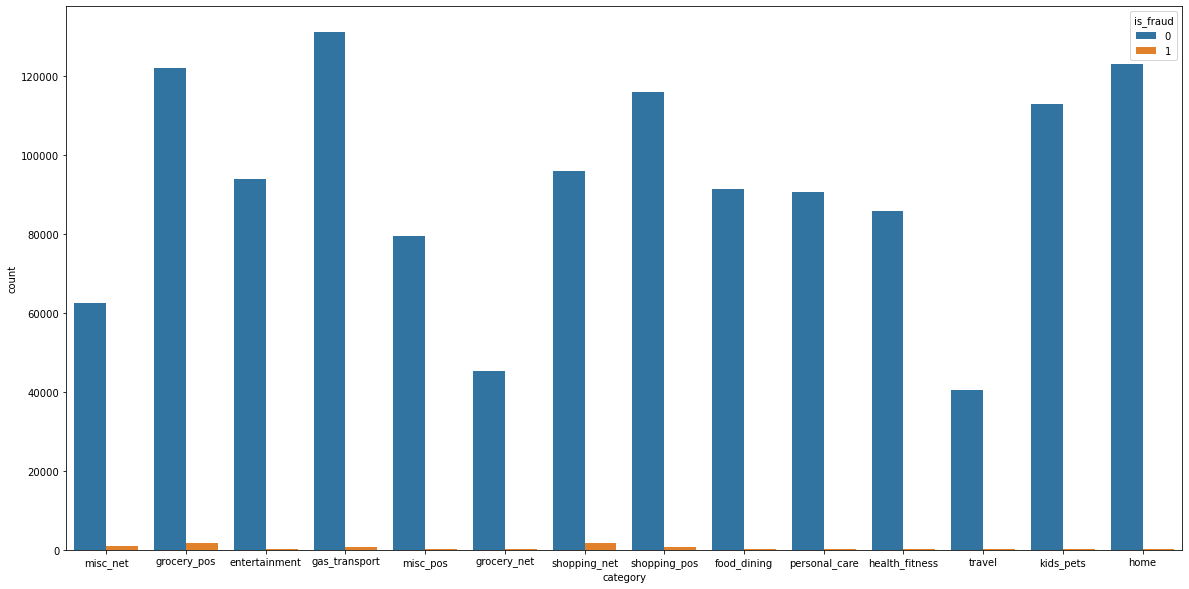

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(data = fraud, x = 'category', hue='is_fraud')

<AxesSubplot:xlabel='category', ylabel='count'>

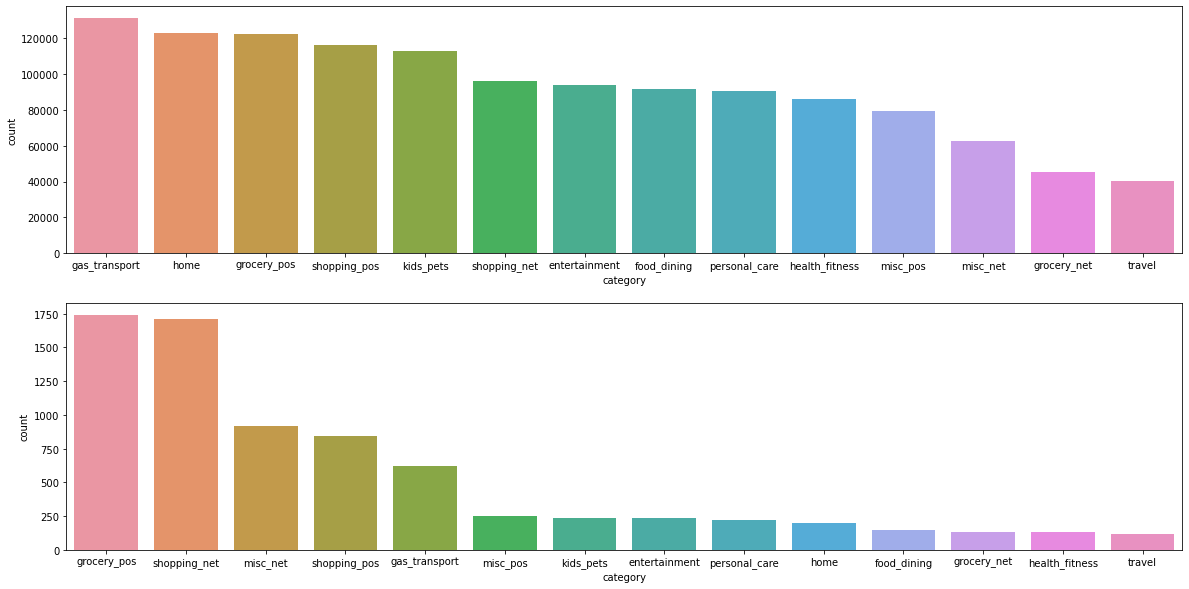

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.countplot(data = fraud_0, x = 'category', order=fraud_0.category.value_counts().index)

plt.subplot(2,1,2)
sns.countplot(data = fraud_1, x = 'category', order=fraud_1.category.value_counts().index)

In [50]:
# plt.figure(figsize=(20,10))

# plt.subplot(2,1,1)
# sns.countplot(data = fraud_0, x = 'category', order=sorted(fraud_0.category.unique()))

# plt.subplot(2,1,2)
# sns.countplot(data = fraud_1, x = 'category', order=sorted(fraud_1.category.unique()))

In [51]:
df = fraud.groupby(by='category').sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)


df2 = fraud.groupby(by='category').count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)


category_df = df.join(df2)
category_df['Percentage_fraud']=category_df['Fraud_count']/category_df['Total_count']*100
category_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
category_df

,Fraud_count,Total_count,Percentage_fraud
category,,,
shopping_net,1713,97543,1.76
misc_net,915,63287,1.45
grocery_pos,1743,123638,1.41
shopping_pos,843,116672,0.72
gas_transport,618,131659,0.47
misc_pos,250,79655,0.31
grocery_net,134,45452,0.29
travel,116,40507,0.29
entertainment,233,94014,0.25


- `grocery_pos`,`shopping_net` lead the way in frauds, followed by `misc_net`, `shopping_pos` and `gas_transport`

**Gender**

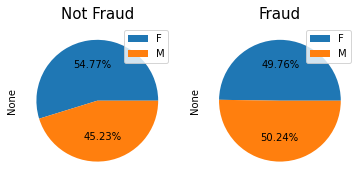

In [52]:
plt.subplot(1,2,1)
fraud_0.groupby('gender').size().plot(kind='pie', autopct='%.2f%%',labeldistance=None)
plt.legend(loc='upper right')
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.subplot(1,2,2)
fraud_1.groupby('gender').size().plot(kind='pie', autopct='%.2f%%', labeldistance=None)
plt.legend(loc='upper right')
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.show()

- Males are more likely to commit fraud compared to females

**Haversine distance**

In [53]:
print(color.BOLD+color.UNDERLINE+color.RED+'Overall:'+color.END)
print(fraud.distance.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Not Fraud:'+color.END)
print(fraud_0.distance.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Fraud:'+color.END)
print(fraud_1.distance.describe())

Overall:
count   1,296,675.00
mean           76.11
std            29.12
min             0.02
25%            55.33
50%            78.23
75%            98.50
max           152.12
Name: distance, dtype: float64
Not Fraud:
count   1,289,169.00
mean           76.11
std            29.12
min             0.02
25%            55.33
50%            78.23
75%            98.50
max           152.12
Name: distance, dtype: float64
Fraud:
count   7,506.00
mean       76.27
std        28.75
min         0.74
25%        55.64
50%        77.94
75%        98.39
max       144.52
Name: distance, dtype: float64


<AxesSubplot:xlabel='is_fraud', ylabel='distance'>

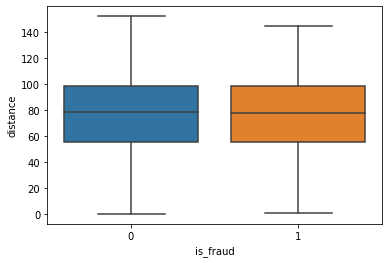

In [54]:
#boxplot
sns.boxplot(data=fraud, y='distance', x='is_fraud')

- not much difference between the two

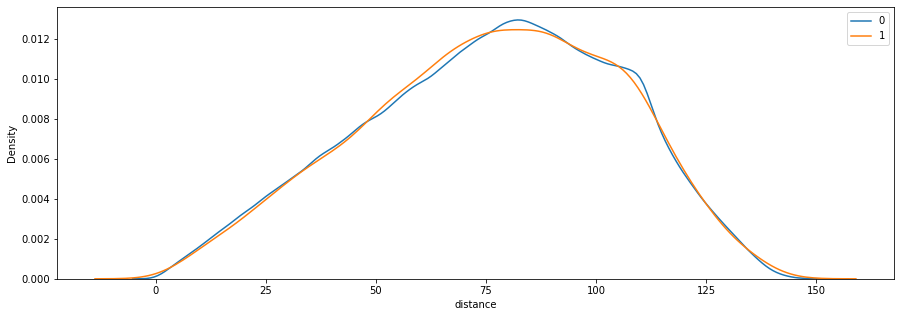

In [55]:
#density plot
plt.figure(figsize=(15,5))
sns.kdeplot(fraud_0.distance, label='0')
sns.kdeplot(fraud_1.distance, label='1')
plt.legend()
plt.show()

**Age**

<AxesSubplot:xlabel='is_fraud', ylabel='age_years'>

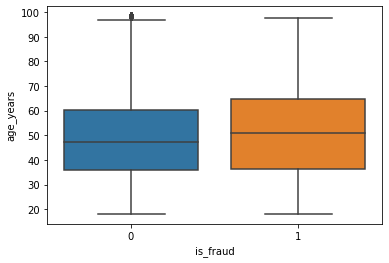

In [56]:
# boxplot
sns.boxplot(data=fraud, x='is_fraud', y='age_years')

In [57]:
print(color.BOLD+color.UNDERLINE+color.RED+'Overall:'+color.END)
print(fraud.age_years.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Not Fraud:'+color.END)
print(fraud_0.age_years.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Fraud:'+color.END)
print(fraud_1.age_years.describe())

Overall:
count   1,296,675.00
mean           49.37
std            17.40
min            18.03
25%            35.98
50%            47.22
75%            60.52
max            98.33
Name: age_years, dtype: float64
Not Fraud:
count   1,289,169.00
mean           49.36
std            17.39
min            18.03
25%            35.98
50%            47.22
75%            60.40
max            98.33
Name: age_years, dtype: float64
Fraud:
count   7,506.00
mean       52.20
std        18.86
min        18.03
25%        36.22
50%        51.13
75%        64.64
max        97.50
Name: age_years, dtype: float64


- mean and median a bit higher for Frauds


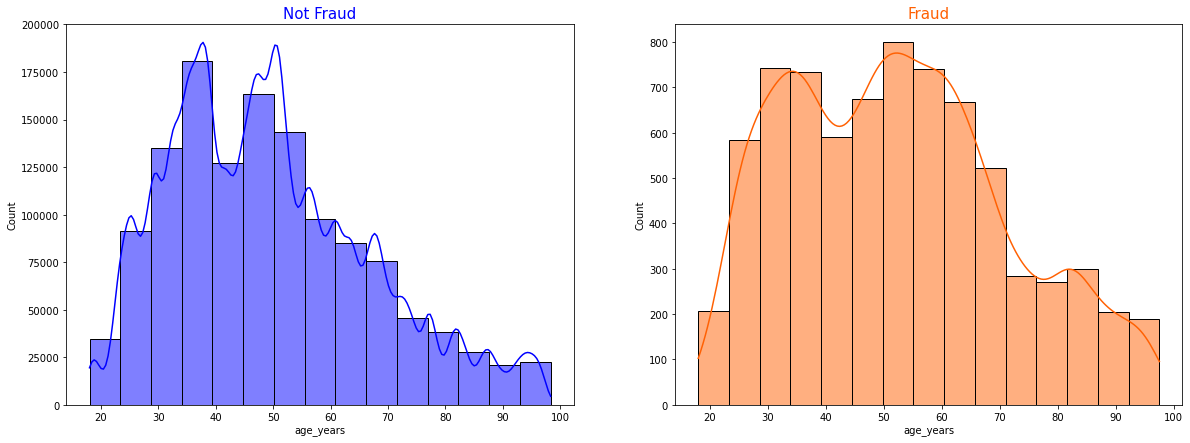

In [58]:
#histogram
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(fraud_0.age_years, bins=15,color='blue', kde=True)
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})

plt.subplot(1,2,2)
sns.histplot(fraud_1.age_years, bins=15,color='#FF6103', kde=True)
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'#FF6103'})

plt.show()

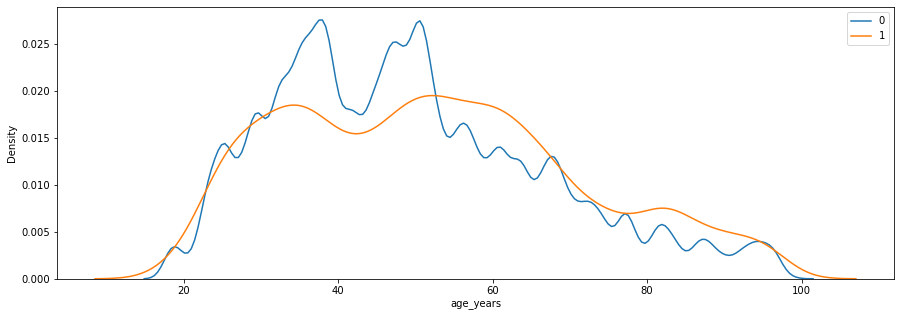

In [59]:
#density plot
plt.figure(figsize=(15,5))
sns.kdeplot(fraud_0.age_years, label='0')
sns.kdeplot(fraud_1.age_years, label='1')
plt.legend()
plt.show()

- both show a skewed distribution
- it would be better to treat age columns as categorical while building the model since we can't see any numerical relation with the target variable
- would bin the age column into different categories based on quantile cuts

**Merchants**

In [60]:
# top fraud merchants according to percentage of fraud transactions
df = fraud.groupby(by='merchant').sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)

df2 = fraud.groupby(by='merchant').count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)

merch_df = df.join(df2)
merch_df['Percentage_fraud']=merch_df['Fraud_count']/merch_df['Total_count']*100
merch_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
merch_df.head()

,Fraud_count,Total_count,Percentage_fraud
merchant,,,
Kozey-Boehm,48,1866,2.57
"Herman, Treutel and Dickens",33,1300,2.54
Kerluke-Abshire,41,1838,2.23
Brown PLC,26,1176,2.21
Goyette Inc,42,1943,2.16


In [61]:
merch_df.describe()

,Fraud_count,Total_count,Percentage_fraud
count,693.00,693.00,693.00
mean,10.83,"1,871.10",0.56
std,11.55,575.36,0.56
min,0.00,727.00,0.00
25%,3.00,"1,592.00",0.17
50%,5.00,"1,863.00",0.32
75%,16.00,"2,345.00",0.78
max,49.00,"4,403.00",2.57


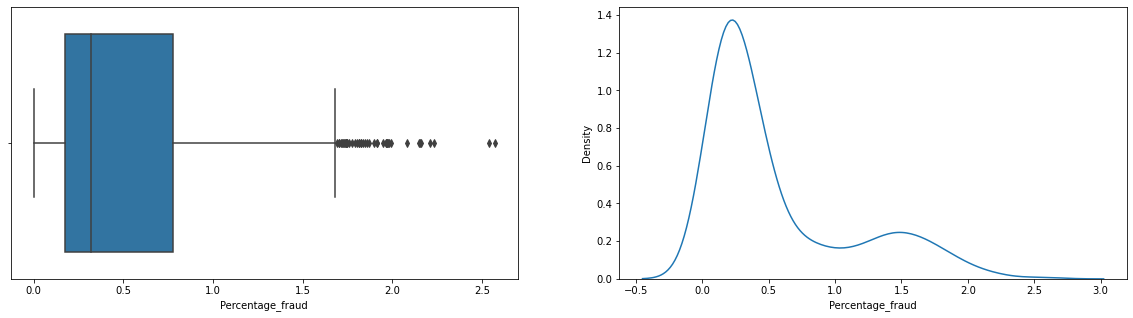

In [62]:
plt.figure(figsize=(20,5))

#boxplot
plt.subplot(1,2,1)
sns.boxplot(merch_df.Percentage_fraud)

#density plot
plt.subplot(1,2,2)
sns.kdeplot(merch_df.Percentage_fraud)

plt.show()

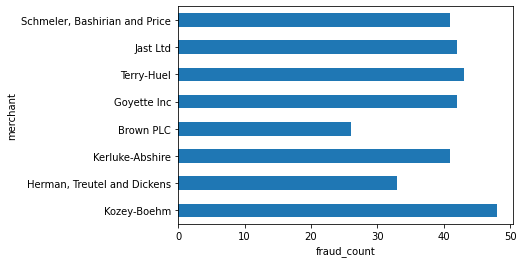

In [63]:
# Top Frauds
merch_df[merch_df.Percentage_fraud>=2]['Fraud_count'].plot(kind='barh')
plt.xlabel('fraud_count')
plt.show()

- will bin merchants into different groups based on the percentage frauds
    - Less_likely: Percentage_fraud less than 1%
    - Likely: Percentage_fraud between 1 and 2%
    - More_likely: Percentage_fraud more than 2%

**State**

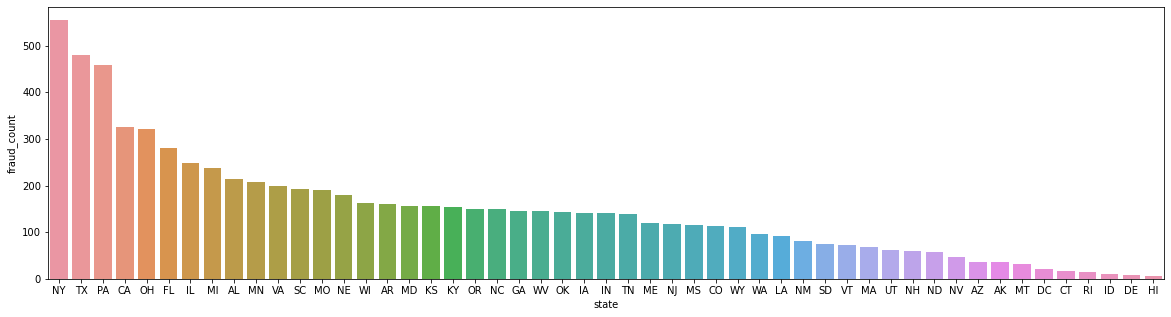

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(data = fraud[fraud.is_fraud==1], x = 'state', order=fraud[fraud.is_fraud==1].state.value_counts().index)
plt.ylabel('fraud_count')
plt.show()

In [65]:
df = fraud.groupby(by='state').sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)

df2 = fraud.groupby(by='state').count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)

state_df = df.join(df2)
state_df['Percentage_fraud']=state_df['Fraud_count']/state_df['Total_count']*100
state_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
state_df.head()

,Fraud_count,Total_count,Percentage_fraud
state,,,
DE,9,9,100.00
RI,15,550,2.73
AK,36,2120,1.70
NV,47,5607,0.84
CO,113,13880,0.81


In [66]:
state_df.describe()

,Fraud_count,Total_count,Percentage_fraud
count,51.00,51.00,51.00
mean,147.18,"25,425.00",2.58
std,118.29,"20,081.69",13.92
min,7.00,9.00,0.20
25%,65.00,"12,046.00",0.51
50%,142.00,"22,996.00",0.57
75%,185.50,"29,817.00",0.67
max,555.00,"94,876.00",100.00


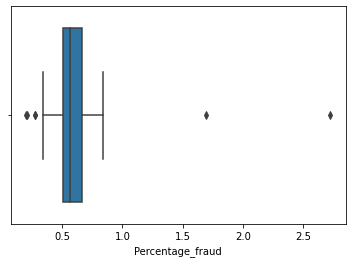

In [67]:
# boxplot where Percentage_fraud!=100
sns.boxplot(state_df[state_df.Percentage_fraud!=100].Percentage_fraud)

plt.show()

In [68]:
state_df[state_df.Percentage_fraud!=100].describe()

,Fraud_count,Total_count,Percentage_fraud
count,50.00,50.00,50.00
mean,149.94,"25,933.32",0.63
std,117.81,"19,951.38",0.37
min,7.00,550.00,0.20
25%,69.75,"12,337.00",0.51
50%,142.00,"23,582.00",0.57
75%,188.25,"30,041.50",0.66
max,555.00,"94,876.00",2.73


- bar chart shows the states in descending order of fraud_count
- most of the states have less than 1% fraud transactions except 3 states
- 'DE' shows a red flag as all the transactions happened here are fraud
- we can do binning of state column to group cities into different categories depending on percentage of fraud transactions
    - less_likely: Percentage_fraud<1
    - likely: Percentage_fraud between 1 and 2
    - more_likely: Percentage_fraud>2 

**City**

In [69]:
df = fraud.groupby(by=['state','city']).sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)

df2 = fraud.groupby(by=['state','city']).count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)

state_city_df = df.join(df2)
state_city_df['Percentage_fraud']=state_city_df['Fraud_count']/state_city_df['Total_count']*100
state_city_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
state_city_df.head()

,,Fraud_count,Total_count,Percentage_fraud
state,city,,,
LA,Madisonville,11,11,100.00
NY,Medford,9,9,100.00
MO,Pleasant Hill,8,8,100.00
SC,Winnsboro,11,11,100.00
NY,Beacon,11,11,100.00


In [70]:
state_city_df.Percentage_fraud.describe()

count   928.00
mean      7.25
std      24.63
min       0.00
25%       0.24
50%       0.63
75%       1.15
max     100.00
Name: Percentage_fraud, dtype: float64

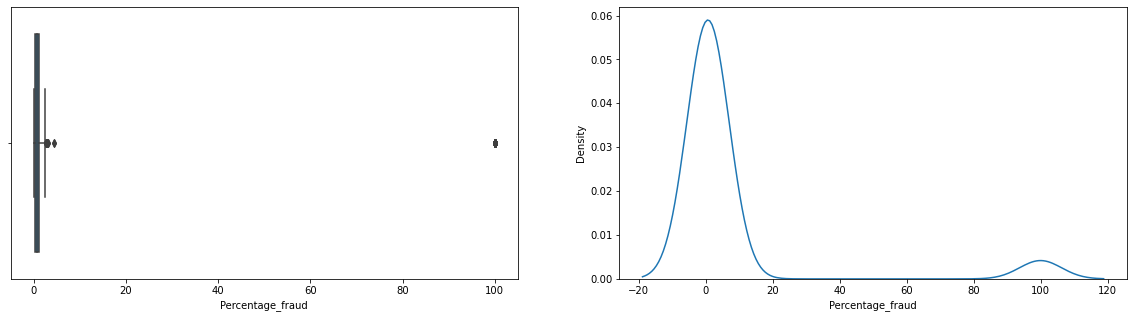

In [71]:
plt.figure(figsize=(20,5))

#boxplot
plt.subplot(1,2,1)
sns.boxplot(state_city_df.Percentage_fraud)

#density plot
plt.subplot(1,2,2)
sns.kdeplot(state_city_df.Percentage_fraud)

plt.show()

- as can be seen there are some cities where 100% fraud transactions have occured, which raises a red flag

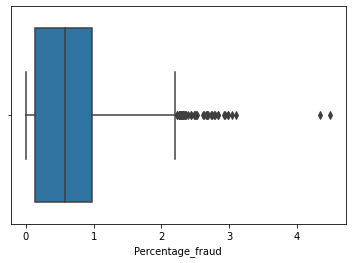

In [72]:
# boxplot where Percentage_fraud!=100
sns.boxplot(state_city_df[state_city_df.Percentage_fraud!=100].Percentage_fraud)

plt.show()

- we can do binning of city column to group cities into different categories depending on percentage of fraud transactions
    - less_likely: Percentage_fraud<1
    - likely: Percentage_fraud between 1 and 2
    - more_likely: Percentage_fraud>2 

**Jobs**

In [73]:
df = fraud.groupby(by='job').sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)

df2 = fraud.groupby(by='job').count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)

job_df = df.join(df2)
job_df['Percentage_fraud']=job_df['Fraud_count']/job_df['Total_count']*100
job_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
job_df.head()

,Fraud_count,Total_count,Percentage_fraud
job,,,
Personnel officer,12,12,100.00
Air traffic controller,17,17,100.00
"Accountant, chartered",11,11,100.00
Ship broker,7,7,100.00
Solicitor,11,11,100.00


In [74]:
job_df.Percentage_fraud.describe()

count   494.00
mean      4.55
std      19.12
min       0.00
25%       0.35
50%       0.64
75%       0.98
max     100.00
Name: Percentage_fraud, dtype: float64

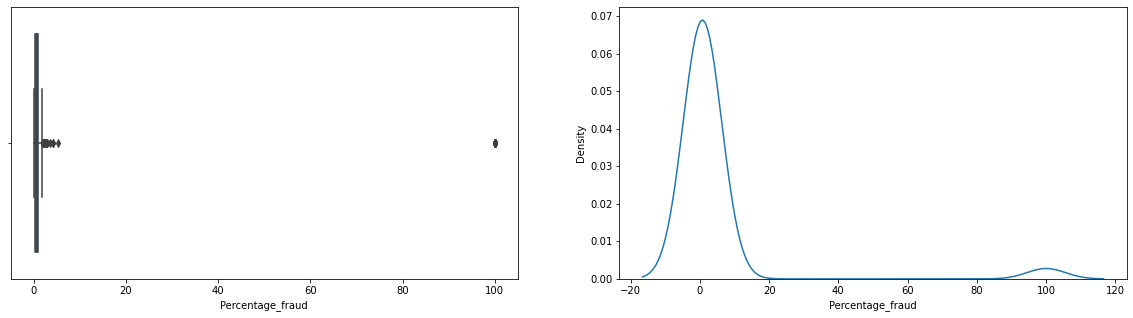

In [75]:
plt.figure(figsize=(20,5))

#boxplot
plt.subplot(1,2,1)
sns.boxplot(job_df.Percentage_fraud)

#density plot
plt.subplot(1,2,2)
sns.kdeplot(job_df.Percentage_fraud)

plt.show()

- as can be seen there are some jobs where 100% fraud transactions have occured, which raises a red flag

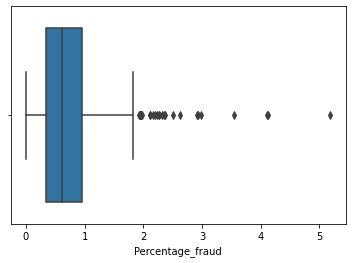

In [76]:
# boxplot where Percentage_fraud!=100
sns.boxplot(job_df[job_df.Percentage_fraud!=100].Percentage_fraud)

plt.show()

- we can do binning of job column to group jobs into different categories depending on percentage of fraud transactions
    - less_likely: Percentage_fraud<1
    - likely: Percentage_fraud between 1 and 2
    - more_likely: Percentage_fraud>2 

**city_pop**

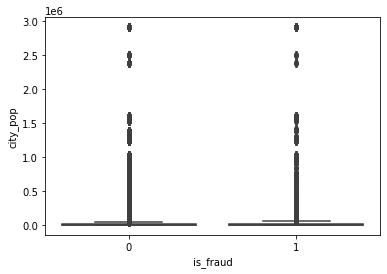

In [77]:
sns.boxplot(data=fraud, x='is_fraud', y='city_pop')
plt.show()

In [78]:
print(color.BOLD+color.UNDERLINE+color.RED+'Overall:'+color.END)
print(fraud.city_pop.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Not Fraud:'+color.END)
print(fraud_0.city_pop.describe())
print('='*50)
print(color.BOLD+color.UNDERLINE+color.RED+'Fraud:'+color.END)
print(fraud_1.city_pop.describe())

Overall:
count   1,296,675.00
mean       88,824.44
std       301,956.36
min            23.00
25%           743.00
50%         2,456.00
75%        20,328.00
max     2,906,700.00
Name: city_pop, dtype: float64
Not Fraud:
count   1,289,169.00
mean       88,775.23
std       301,806.55
min            23.00
25%           743.00
50%         2,456.00
75%        20,328.00
max     2,906,700.00
Name: city_pop, dtype: float64
Fraud:
count       7,506.00
mean       97,276.76
std       326,581.47
min            23.00
25%           746.50
50%         2,623.00
75%        21,437.00
max     2,906,700.00
Name: city_pop, dtype: float64


- not much difference between the two

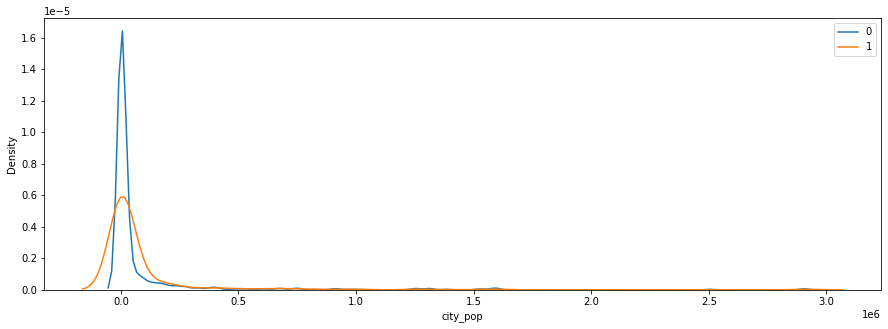

In [79]:
#density plot
plt.figure(figsize=(15,5))
sns.kdeplot(fraud_0.city_pop, label='0')
sns.kdeplot(fraud_1.city_pop, label='1')
plt.legend()
plt.show()

- skewed distribution
- both show the same variation

**monthyear**

In [80]:
# plt.figure(figsize=(20,6))
# sns.countplot(data=fraud, x='monthyear')
# plt.xticks(rotation=45)
# plt.show()

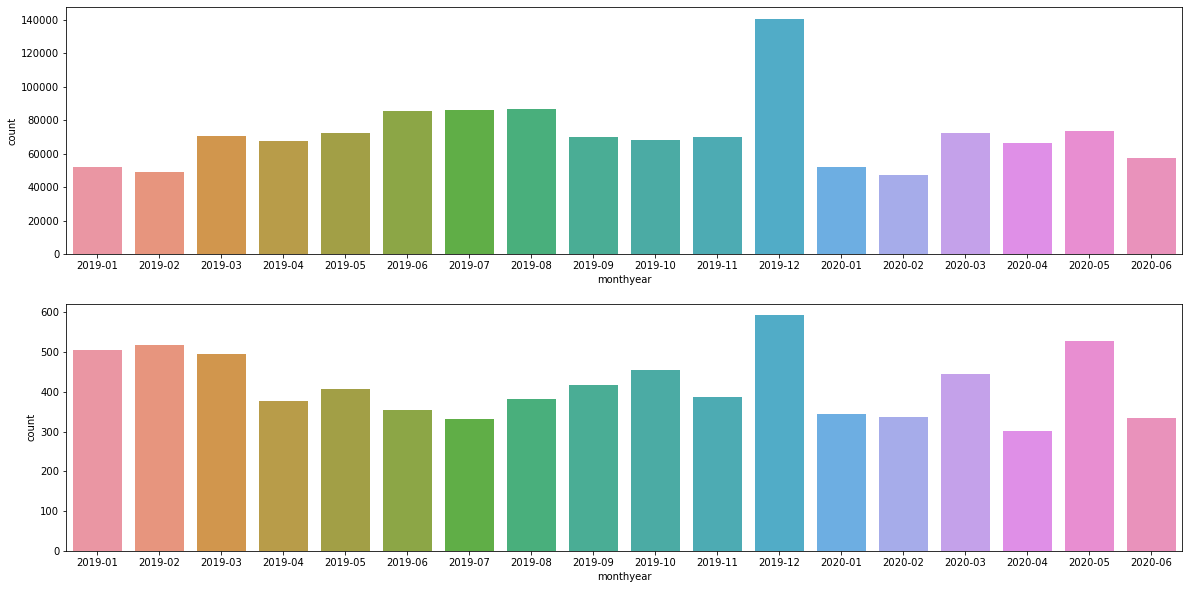

In [81]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.countplot(data = fraud_0, x = 'monthyear')

plt.subplot(2,1,2)
sns.countplot(data = fraud_1, x = 'monthyear')
plt.show()

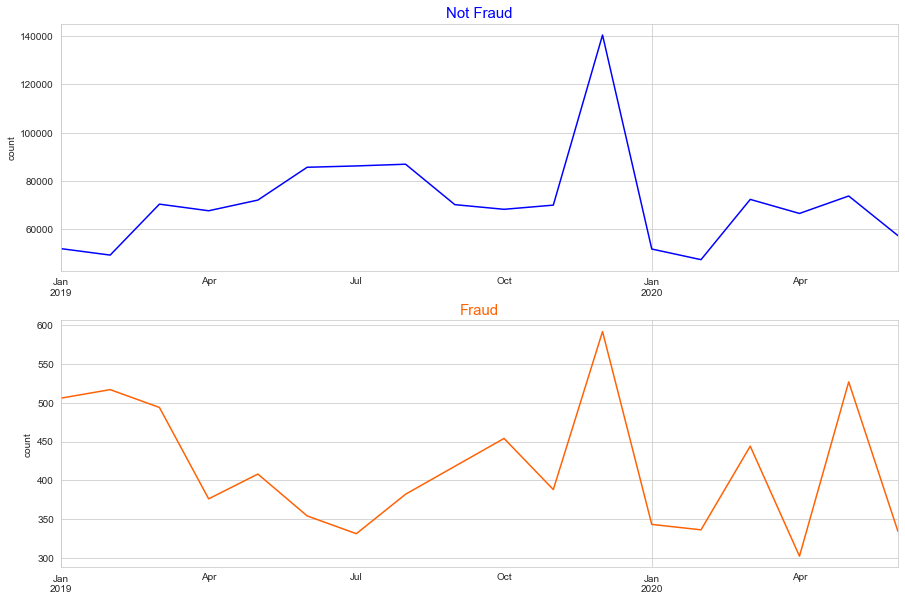

In [82]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
fraud_0.monthyear.value_counts().sort_index().plot(kind='line', color='b')
plt.ylabel('count')
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})

plt.subplot(2,1,2)
fraud_1.monthyear.value_counts().sort_index().plot(kind='line', color='#FF6103')
plt.ylabel('count')
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'#FF6103'})

plt.show()

**Month**

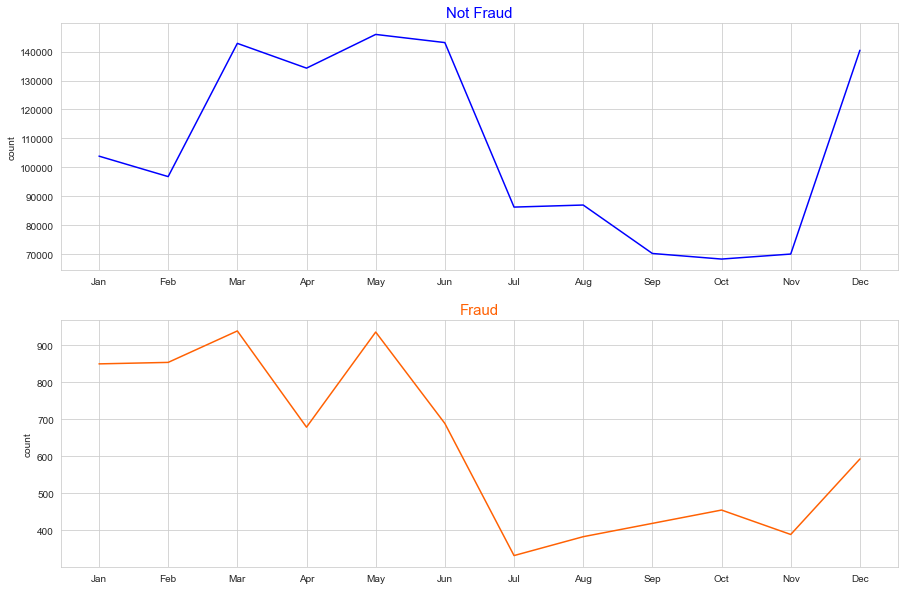

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
fraud_0.month.value_counts().sort_index().plot(kind='line', color='b')
plt.ylabel('count')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})

plt.subplot(2,1,2)
fraud_1.month.value_counts().sort_index().plot(kind='line', color='#FF6103')
plt.ylabel('count')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'#FF6103'})

plt.show()

**day_of_month**

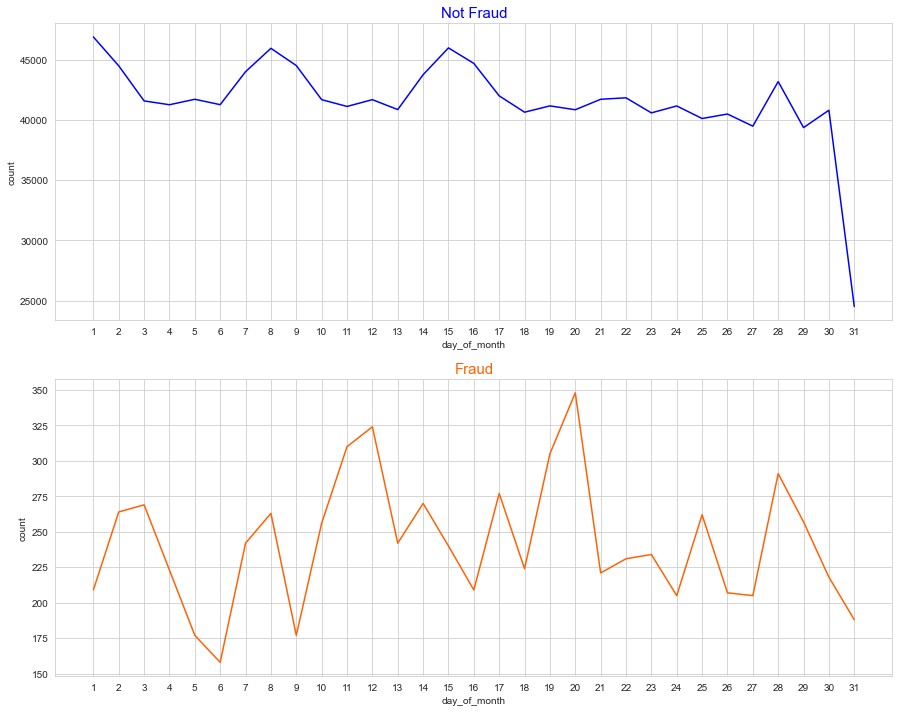

In [84]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
fraud_0.day_of_month.value_counts().sort_index().plot(kind='line', color='b')
plt.ylabel('count')
plt.xlabel('day_of_month')
plt.xticks(range(1,32))
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})

plt.subplot(2,1,2)
fraud_1.day_of_month.value_counts().sort_index().plot(kind='line', color='#FF6103')
plt.ylabel('count')
plt.xlabel('day_of_month')
plt.xticks(range(1,32))
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'#FF6103'})

plt.show()

**day_of_week**

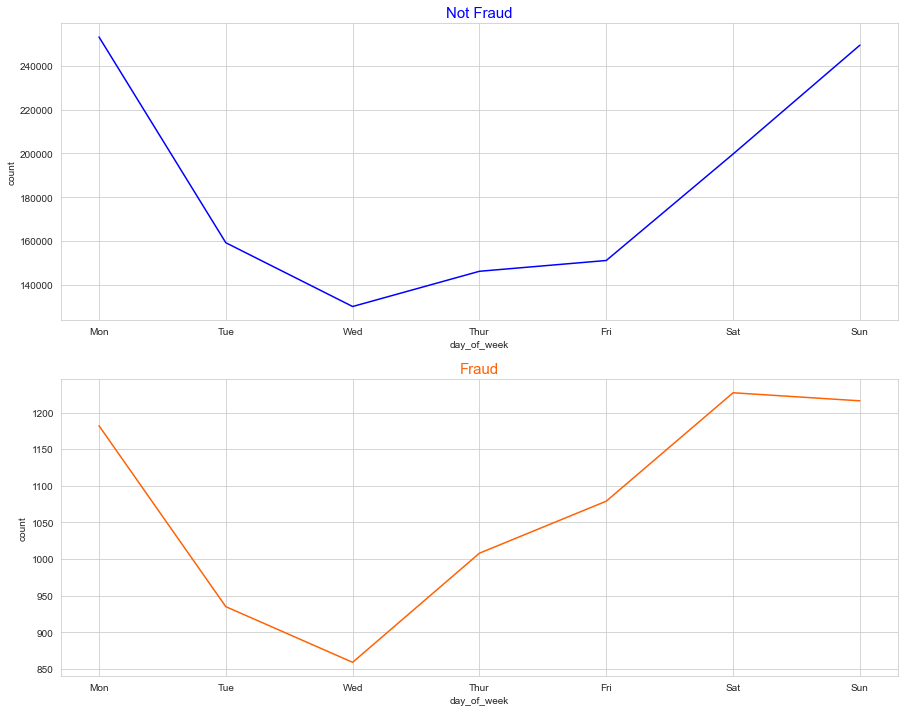

In [85]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
fraud_0.day_of_week.value_counts().sort_index().plot(kind='line', color='b')
plt.ylabel('count')
plt.xlabel('day_of_week')
plt.xticks(ticks=range(1,8), labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})

plt.subplot(2,1,2)
fraud_1.day_of_week.value_counts().sort_index().plot(kind='line', color='#FF6103')
plt.ylabel('count')
plt.xlabel('day_of_week')
plt.xticks(ticks=range(1,8), labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'#FF6103'})

plt.show()

**is_weekend**

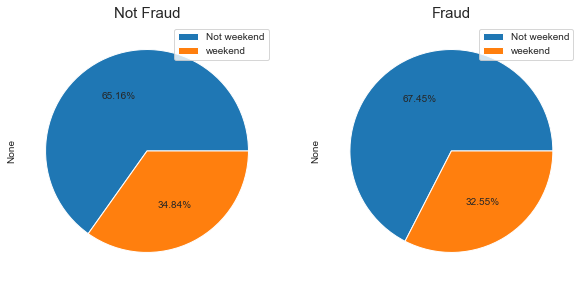

In [86]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
fraud_0.groupby('is_weekend').size().plot(kind='pie', autopct='%.2f%%',labels=['Not weekend','weekend'],labeldistance=None)
plt.legend(loc='upper right')
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.subplot(1,2,2)
fraud_1.groupby('is_weekend').size().plot(kind='pie', autopct='%.2f%%',labels=['Not weekend','weekend'], labeldistance=None)
plt.legend(loc='upper right')
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.show()

In [87]:
fraud.is_weekend.value_counts()

0    845139
1    451536
Name: is_weekend, dtype: int64

**hour_of_day**

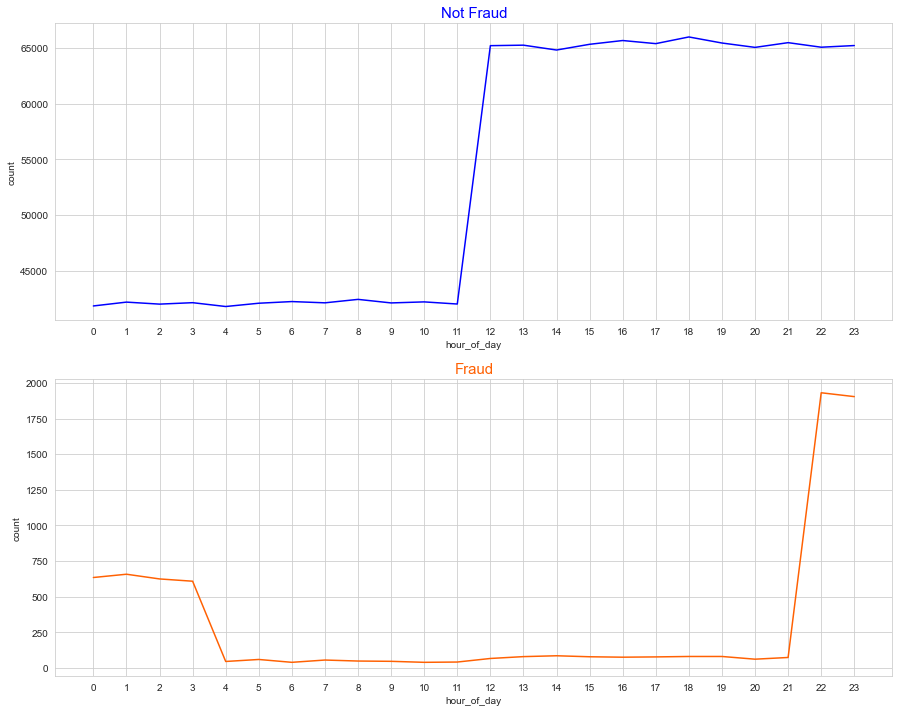

In [88]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
fraud_0.hour_of_day.value_counts().sort_index().plot(kind='line', color='b')
plt.ylabel('count')
plt.xlabel('hour_of_day')
plt.xticks(range(0,24))
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})

plt.subplot(2,1,2)
fraud_1.hour_of_day.value_counts().sort_index().plot(kind='line', color='#FF6103')
plt.ylabel('count')
plt.xlabel('hour_of_day')
plt.xticks(range(0,24))
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5, 'color':'#FF6103'})

plt.show()

- Mostly transaction activities occur between 12:00 hours and 23:00 hours
- we can clearly see that most of the fraud between 22:00 hours and 03:00 hours
- we will bin the column into different categories and then later do one-hot encoding

## <font color=red> Data Preprocessing

### <font color=blue> Binning/Grouping

**hour_bin**

- binning hour_of_day column to different bins
    - 0:00 to 3:00 hours: Late Night
    - 4:00 to 11:00 hours: Morning
    - 12:00 to 21:00 hours: Daytime
    - 22:00 to 22:00 hours: Night

In [89]:
# creating hour_bins
bins=[0,3,11,21,23]
labels=['Late Night','Morning','Daytime','Night']
fraud['hour_bin'] = pd.cut(fraud.hour_of_day, bins=bins, labels=labels,include_lowest=True)

# for test data
fraud_test['hour_bin'] = pd.cut(fraud_test.hour_of_day, bins=bins, labels=labels,include_lowest=True)

In [90]:
# dividing data
fraud_0 = fraud[fraud.is_fraud==0]
fraud_1 = fraud[fraud.is_fraud==1]

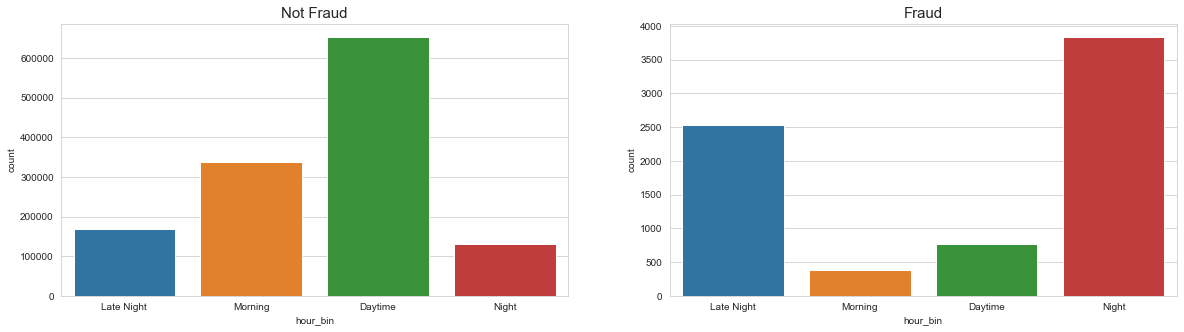

In [91]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data = fraud_0, x = 'hour_bin')
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.subplot(1,2,2)
sns.countplot(data = fraud_1, x = 'hour_bin')
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.show()

In [92]:
df = fraud.groupby(by='hour_bin').sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)


df2 = fraud.groupby(by='hour_bin').count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)


hour_df = df.join(df2)
hour_df['Percentage_fraud']=hour_df['Fraud_count']/hour_df['Total_count']*100
hour_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
hour_df

,Fraud_count,Total_count,Percentage_fraud
hour_bin,,,
Night,3835,134086,2.86
Late Night,2527,170796,1.48
Daytime,764,654213,0.12
Morning,380,337580,0.11


**age_bin**

In [93]:
# age binning
labels = ['under 34','34-43','43-52','52-64','64+']
fraud['age_bin']= pd.qcut(x=fraud.age_years, q=5, labels=labels)

# for test data
fraud_test['age_bin']= pd.qcut(x=fraud_test.age_years, q=5, labels=labels)

In [94]:
# dividing data
fraud_0 = fraud[fraud.is_fraud==0]
fraud_1 = fraud[fraud.is_fraud==1]

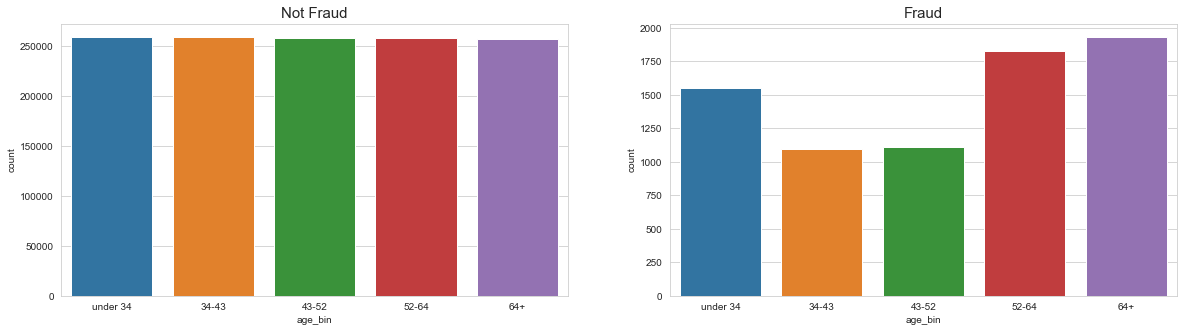

In [95]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data = fraud_0, x = 'age_bin')
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.subplot(1,2,2)
sns.countplot(data = fraud_1, x = 'age_bin')
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.show()

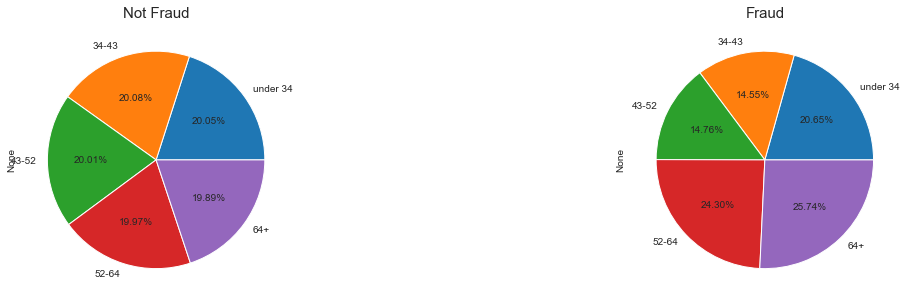

In [96]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
fraud_0.groupby('age_bin').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Not Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.subplot(1,2,2)
fraud_1.groupby('age_bin').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Fraud', fontdict={'fontsize':15, 'fontweight':5})

plt.show()

In [97]:
df = fraud.groupby(by='age_bin').sum()[['is_fraud']]
df.rename(columns={'is_fraud':'Fraud_count'}, inplace=True)


df2 = fraud.groupby(by='age_bin').count()[['is_fraud']]
df2.rename(columns={'is_fraud':'Total_count'}, inplace=True)


age_df = df.join(df2)
age_df['Percentage_fraud']=age_df['Fraud_count']/age_df['Total_count']*100
age_df.sort_values(by='Percentage_fraud', ascending=False, inplace=True)
age_df

,Fraud_count,Total_count,Percentage_fraud
age_bin,,,
64+,1932,258369,0.75
52-64,1824,259333,0.70
under 34,1550,259976,0.60
43-52,1108,259015,0.43
34-43,1092,259982,0.42


- here we can clearly see that different age categories having same total count have different counts of frauds
- '64+' and '52-64' age categories show highest frauds

**merch_bin**

- will bin merchants into different groups based on the percentage frauds
    - Less_likely: Percentage_fraud less than 1%
    - Likely: Percentage_fraud between 1 and 2%
    - More_likely: Percentage_fraud more than 2%

In [98]:
# list of merchants with less_liely and more_likely frauds
merch_less_likely_fraud = list(merch_df[merch_df.Percentage_fraud<=1].index)
merch_more_likely_fraud = list(merch_df[merch_df.Percentage_fraud>2].index)

# function for binning
def merch_bin_map(merch):
    if merch in merch_less_likely_fraud:
        return 'fraud_less_likely'
    elif merch in merch_more_likely_fraud:
        return 'fraud_more_likely'
    else:
        return 'fraud_likely'

# binning   
fraud['merch_bin'] = fraud.merchant.apply(merch_bin_map)

# for test data
fraud_test['merch_bin'] = fraud_test.merchant.apply(merch_bin_map)

**city_bin**

- we can do binning of city column to group cities into different categories depending on percentage of fraud transactions
    - less_likely: Percentage_fraud<1
    - likely: Percentage_fraud between 1 and 2
    - more_likely: Percentage_fraud>2 

In [99]:
# list of cities
city_less_likely_fraud = list(state_city_df[state_city_df.Percentage_fraud<=1].reset_index().city)
city_likely_fraud = list(state_city_df[(state_city_df.Percentage_fraud>1) & (state_city_df.Percentage_fraud<=2)].reset_index().city)
# city_definite_fraud = list(state_city_df[state_city_df.Percentage_fraud==100].reset_index().city)

# function for binning
def city_bin_map(city):
    if city in city_less_likely_fraud:
        return 'fraud_less_likely'
    elif city in city_likely_fraud:
        return 'fraud_likely'
#     elif city in city_definite_fraud:
#         return 'fraud_definite'
    else:
        return 'fraud_more_likely'
    
# binning
fraud['city_bin'] = fraud.city.apply(city_bin_map)

# for test data
fraud_test['city_bin'] = fraud_test.city.apply(city_bin_map)

**job_bin**

- we can do binning of job column to group jobs into different categories depending on percentage of fraud transactions
    - less_likely: Percentage_fraud<1
    - likely: Percentage_fraud between 1 and 2
    - more_likely: Percentage_fraud>2 

In [100]:
# list of jobs
job_less_likely_fraud = list(job_df[job_df.Percentage_fraud<=1].reset_index().job)
job_likely_fraud = list(job_df[(job_df.Percentage_fraud>1) & (job_df.Percentage_fraud<=2)].reset_index().job)
# job_definite_fraud = list(job_df[job_df.Percentage_fraud==100].reset_index().job)

# function for binning
def job_bin_map(job):
    if job in job_less_likely_fraud:
        return 'fraud_less_likely'
    elif job in job_likely_fraud:
        return 'fraud_likely'
#     elif job in job_definite_fraud:
#         return 'fraud_definite'
    else:
        return 'fraud_more_likely'
    
# binning
fraud['job_bin'] = fraud.job.apply(job_bin_map)

# for test data
fraud_test['job_bin'] = fraud_test.job.apply(job_bin_map)

In [101]:
# # grouping all states into one category 'others' except ['NY', 'TX', 'PA', 'DE', 'RI', 'AK']
# state_group = ['NY', 'TX', 'PA', 'DE', 'RI', 'AK']
# fraud.state = fraud.state.apply(lambda x: x if x in state_group else 'other')


# # for test data
# fraud_test.state = fraud_test.state.apply(lambda x: x if x in state_group else 'other')

**state_bin**

In [102]:
# list of states
state_less_likely_fraud = list(state_df[state_df.Percentage_fraud<=1].reset_index().state)
state_likely_fraud = list(state_df[(state_df.Percentage_fraud>1) & (state_df.Percentage_fraud<=2)].reset_index().state)
# state_definite_fraud = list(state_df[state_df.Percentage_fraud==100].reset_index().state)

# function for binning
def state_bin_map(state):
    if state in state_less_likely_fraud:
        return 'fraud_less_likely'
    elif state in state_likely_fraud:
        return 'fraud_likely'
#     elif state in state_definite_fraud:
#         return 'fraud_definite'
    else:
        return 'fraud_more_likely'
    
# binning
fraud['state_bin'] = fraud.state.apply(state_bin_map)

# for test data
fraud_test['state_bin'] = fraud_test.state.apply(state_bin_map)

**Category**

In [103]:
# grouping all categories as 'others' except top 5 which are contributing most towards fraud cases
category_group = ['misc_pos', 'kids_pets', 'entertainment','personal_care', 
                  'home', 'food_dining', 'grocery_net', 'health_fitness', 'travel']
fraud.category = fraud.category.apply(lambda x: 'other' if x in category_group else x)


# for test data
fraud_test.category = fraud_test.category.apply(lambda x: 'other' if x in category_group else x)

### <font color=blue> Removing unwanted columns

In [104]:
# removing unwanted columns
cols_remove = ['trans_date_trans_time','cc_num','merchant',
       'first', 'last', 'street', 'zip', 'lat','city',
       'long','job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'age_days', 'age_years','trans_date', 'trans_time', 'day_of_month',
       'hour_of_day','day_of_week','monthyear','month','state']
fraud.drop(columns=cols_remove, inplace=True)

#for test data
fraud_test.drop(columns=cols_remove, inplace=True)

### <font color=blue> Dummification / Binary Encoding / One Hot Encoding

In [105]:
# binary_encoding
fraud['gender']= fraud.gender.apply(lambda x: 0 if x=='M' else 1)

# for test data
fraud_test['gender']= fraud_test.gender.apply(lambda x: 0 if x=='M' else 1)

In [106]:
# one_hot encoding
cols = ['category','state_bin','merch_bin','age_bin', 'hour_bin', 'city_bin', 'job_bin']
fraud = pd.get_dummies(fraud, columns=cols, drop_first=True, prefix=None)

# for test data
fraud_test = pd.get_dummies(fraud_test, columns=cols, drop_first=True, prefix=None)

In [107]:
print(fraud.shape)
print(fraud_test.shape)

(1296675, 26)
(555719, 26)


In [108]:
fraud_test.head()

,amt,gender,city_pop,is_fraud,distance,is_weekend,category_grocery_pos,category_misc_net,category_other,category_shopping_net,category_shopping_pos,state_bin_fraud_likely,state_bin_fraud_more_likely,merch_bin_fraud_likely,merch_bin_fraud_more_likely,age_bin_34-43,age_bin_43-52,age_bin_52-64,age_bin_64+,hour_bin_Morning,hour_bin_Daytime,hour_bin_Night,city_bin_fraud_likely,city_bin_fraud_more_likely,job_bin_fraud_likely,job_bin_fraud_more_likely
0,2.86,0,333497,0,24.56,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,29.84,1,302,0,104.93,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,41.28,1,34496,0,59.08,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,60.05,0,54767,0,27.70,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,3.19,0,1126,0,104.34,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [109]:
fraud.head()

,amt,gender,city_pop,is_fraud,distance,is_weekend,category_grocery_pos,category_misc_net,category_other,category_shopping_net,category_shopping_pos,state_bin_fraud_likely,state_bin_fraud_more_likely,merch_bin_fraud_likely,merch_bin_fraud_more_likely,age_bin_34-43,age_bin_43-52,age_bin_52-64,age_bin_64+,hour_bin_Morning,hour_bin_Daytime,hour_bin_Night,city_bin_fraud_likely,city_bin_fraud_more_likely,job_bin_fraud_likely,job_bin_fraud_more_likely
0,4.97,1,3495,0,78.60,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,0,30.21,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,0,4154,0,108.21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,45.00,0,1939,0,95.67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,41.96,0,99,0,77.56,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [110]:
fraud.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'distance', 'is_weekend',
       'category_grocery_pos', 'category_misc_net', 'category_other',
       'category_shopping_net', 'category_shopping_pos',
       'state_bin_fraud_likely', 'state_bin_fraud_more_likely',
       'merch_bin_fraud_likely', 'merch_bin_fraud_more_likely',
       'age_bin_34-43', 'age_bin_43-52', 'age_bin_52-64', 'age_bin_64+',
       'hour_bin_Morning', 'hour_bin_Daytime', 'hour_bin_Night',
       'city_bin_fraud_likely', 'city_bin_fraud_more_likely',
       'job_bin_fraud_likely', 'job_bin_fraud_more_likely'],
      dtype='object')

In [111]:
fraud_test.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'distance', 'is_weekend',
       'category_grocery_pos', 'category_misc_net', 'category_other',
       'category_shopping_net', 'category_shopping_pos',
       'state_bin_fraud_likely', 'state_bin_fraud_more_likely',
       'merch_bin_fraud_likely', 'merch_bin_fraud_more_likely',
       'age_bin_34-43', 'age_bin_43-52', 'age_bin_52-64', 'age_bin_64+',
       'hour_bin_Morning', 'hour_bin_Daytime', 'hour_bin_Night',
       'city_bin_fraud_likely', 'city_bin_fraud_more_likely',
       'job_bin_fraud_likely', 'job_bin_fraud_more_likely'],
      dtype='object')

<AxesSubplot:xlabel='amt', ylabel='Density'>

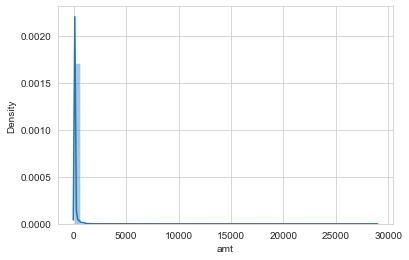

In [136]:
sns.distplot(fraud.amt)

<AxesSubplot:xlabel='city_pop', ylabel='Density'>

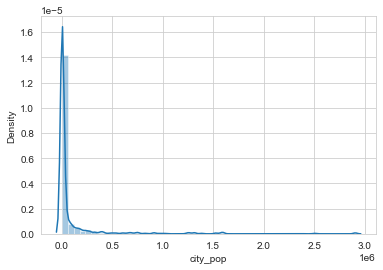

In [142]:
sns.distplot(fraud.city_pop)

### <font color=blue> Split into X and y

In [167]:
#train
y_train = fraud[['is_fraud']]
X_train = fraud.drop(columns='is_fraud')

#test
y_test = fraud_test[['is_fraud']]
X_test = fraud_test.drop(columns='is_fraud')

In [131]:
X_train.head()

,amt,gender,city_pop,distance,is_weekend,category_grocery_pos,category_misc_net,category_other,category_shopping_net,category_shopping_pos,state_bin_fraud_likely,state_bin_fraud_more_likely,merch_bin_fraud_likely,merch_bin_fraud_more_likely,age_bin_34-43,age_bin_43-52,age_bin_52-64,age_bin_64+,hour_bin_Morning,hour_bin_Daytime,hour_bin_Night,city_bin_fraud_likely,city_bin_fraud_more_likely,job_bin_fraud_likely,job_bin_fraud_more_likely
0,4.97,1,3495,78.60,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,30.21,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,0,4154,108.21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,45.00,0,1939,95.67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,41.96,0,99,77.56,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### <font color=blue> Standard Scaler

In [163]:
# num_cols = ['amt','city_pop','distance']

# # importing library
# from sklearn.preprocessing import StandardScaler

# # initiate object
# scaler = StandardScaler()

# # fit_transform() train data
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# # transform() test data
# X_test[num_cols] = scaler.transform(X_test[num_cols])


### <font color=blue> Handling Skewness

In [168]:
#import library
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

# fit_transform() train data
X_train[['amt','city_pop']] = pt.fit_transform(X_train[['amt','city_pop']])

# transform() test data
X_test[['amt','city_pop']] = pt.transform(X_test[['amt','city_pop']])

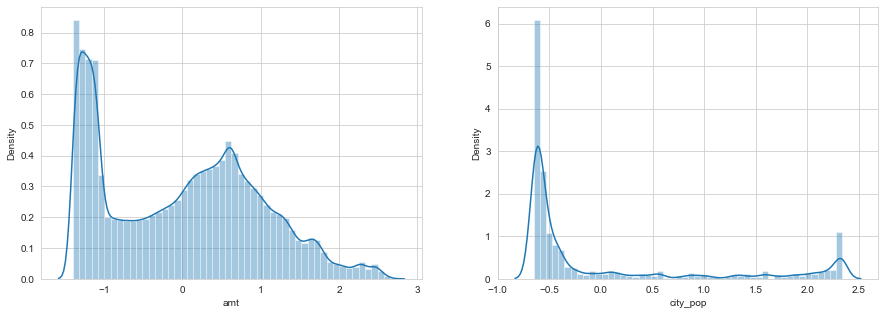

In [166]:
# plt.figure(figsize=(15,5))

# #amt
# plt.subplot(1,2,1)
# sns.distplot(X_train.amt)

# #city_pop
# plt.subplot(1,2,2)
# sns.distplot(X_train.city_pop)

# plt.show()

# after applying both scaling+skewness

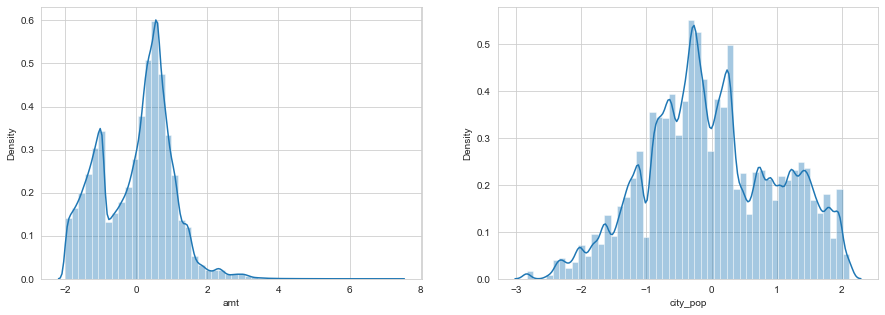

In [169]:
plt.figure(figsize=(15,5))

#amt
plt.subplot(1,2,1)
sns.distplot(X_train.amt)

#city_pop
plt.subplot(1,2,2)
sns.distplot(X_train.city_pop)

plt.show()

# after applying only skewness
# shows better results

### <font color=blue> OverSampling using SMOTE

In [150]:
# pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [151]:
# import library
from imblearn.over_sampling import SMOTE

X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [157]:
y_train_smote.value_counts(normalize=True)*100

is_fraud
0          50.00
1          50.00
dtype: float64

### <font color=blue> OverSampling using ADASYN

In [159]:
# import library
from imblearn.over_sampling import ADASYN

X_train_ada, y_train_ada = ADASYN().fit_resample(X_train, y_train)

In [160]:
y_train_ada.value_counts(normalize=True)*100

is_fraud
1          50.00
0          50.00
dtype: float64

In [ ]:
# defining function to calculate all evaluation terms
from sklearn.metrics import confusion_matrix
def model_eval(y_true, y_pred):
    # confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # accuracy
    acc= (TP+TN)/(TP+TN+FP+FN)
    # sensitivity/recall
    sensi = TP/(TP+FN)
    # specificity
    spec = TN/(TN+FP)
    # Positive Predicted Values or Precision
    prec = TP/(TP+FP)
    # F-Score
    F = (2*prec*sensi)/(prec+sensi)
    
    # display all metrics
    print(color.RED+'Accuracy:'+color.END,round(acc,3))
    print(color.RED+'Sensitivity/Recall:'+color.END,round(sensi,3))
    print(color.RED+'Specificity:'+color.END,round(spec,3))
    print(color.RED+'Precision'+color.END, round(prec,3))
    print(color.RED+'F-score:'+color.END,round(F,3))
    
    # display confusion matrix
    confusion=pd.DataFrame(confusion, columns=['Not Converted','Converted'], index=['Not Converted','Converted'])
    confusion.index.name='Actual/Predicted'
    return confusion

In [ ]:
# defining a func to plot the ROC curve
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(loc="lower right")
    plt.show()

    return None

- split
- scaling
- imbalance
- model building (with and without PCA)
    - logistic
    - Random forest
    - XGBoost